<a href="https://www.kaggle.com/code/maimunulkjisan/hate-speech-detection-model-best-score-finding-ml?scriptVersionId=172918248" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelBinarizer
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("/kaggle/input/bengali-hate-speech-translated-to-english/final_dataset.csv")
df.head()

,sentence,hate,transformed_text
0,নষ্টা মেয়ে তোর মরনের ভয় নেই আল্লাহ তায়ালার ভয়...,1,নষ্টা মেয়ে তোর মরনের ভয় আল্লাহ তায়ালার ভয় সমাজ...
1,বুদা চুদে,1,বুদা চুদে
2,আচুদা লোক জাফরইকবাল গাঞ্জা খাইয়া পোস্ট চুদাস ...,1,আচুদা লোক জাফরইকবাল গাঞ্জা খাইয়া পোস্ট চুদাস এ...
3,মাগীদের আর কি বলবো এরাই সকল নষ্টের মূলএদের কা...,1,মাগীদের বলবো এরাই সকল নষ্টের মূলএদের কারনেই সা...
4,শুয়োরের বাচ্চা নুরু রাশেদের গগন বিদারি চিৎকার...,1,শুয়োরের বাচ্চা নুরু রাশেদের গগন বিদারি চিৎকার ...


In [3]:
def tokenizer(text):
    return text.split()

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(tokenizer=tokenizer)

x = tfidf.fit_transform(df.transformed_text.values.astype('U')) 
y = df.hate.values
x.shape

(39722, 50719)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)


In [5]:
##### MulitnomialNB ######

In [6]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn import metrics

estimator = MultinomialNB()
print(estimator.get_params().keys())

dict_keys(['alpha', 'class_prior', 'fit_prior', 'force_alpha'])


In [7]:

parameters = {
    'alpha': [0.1, 0.2, 0.3, 0.4, 0.5],
    'fit_prior': [True, False],
    'class_prior': [None, [0.5, 0.5]]
}

# Perform grid search using 5-fold cross-validation
grid_search = GridSearchCV(MultinomialNB(), parameters, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Evaluate the classifier on the test set
y_pred = grid_search.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))

Best parameters:  {'alpha': 0.1, 'class_prior': None, 'fit_prior': True}
Best score:  0.8573181624851024
Accuracy:  0.8678414096916299


In [8]:

print("\n########## Multinomial NB algorithm ###########")
clf = MultinomialNB(alpha=0.5, class_prior=None, fit_prior=True)
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.30, random_state=0)
clf = clf.fit(X_train,y_train)
pred = clf.predict(X_test)
score=metrics.accuracy_score(y_test, pred)
print("test size=30, accuracy = {0:.2f}".format(100*score),"%")

clf = MultinomialNB(alpha=0.5, class_prior=None, fit_prior=True)
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.40, random_state=0)
clf = clf.fit(X_train,y_train)
pred = clf.predict(X_test)
score=metrics.accuracy_score(y_test, pred)
print("test size=40, accuracy = {0:.2f}".format(100*score),"%")

clf = MultinomialNB(alpha=0.5, class_prior=None, fit_prior=True)
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.50, random_state=0)
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
pred = clf.predict(X_test)
score=metrics.accuracy_score(y_test, pred)
print("test size=50, accuracy = {0:.2f}".format(100*score),"%")

clf = MultinomialNB(alpha=0.5, class_prior=None, fit_prior=True)
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.60, random_state=0)
clf = clf.fit(X_train,y_train)
pred = clf.predict(X_test)
score=metrics.accuracy_score(y_test, pred)
print("test size=60, accuracy = {0:.2f}".format(100*score),"%")

clf = MultinomialNB(alpha=0.5, class_prior=None, fit_prior=True)
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.70, random_state=0)
clf = clf.fit(X_train,y_train)
pred = clf.predict(X_test)
score=metrics.accuracy_score(y_test, pred)
print("test size=70, accuracy = {0:.2f}".format(100*score),"%")




########## Multinomial NB algorithm ###########
test size=30, accuracy = 84.60 %
test size=40, accuracy = 84.51 %
test size=50, accuracy = 84.75 %
test size=60, accuracy = 84.51 %
test size=70, accuracy = 83.67 %


In [9]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print(classification_report(y_test,pred))
print("Train Accuracy: ", accuracy_score(y_train, clf.predict(X_train))) # compare training actual and predicted value
print("Test Accuracy: ", accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.78      0.83     13772
           1       0.81      0.89      0.85     14034

    accuracy                           0.84     27806
   macro avg       0.84      0.84      0.84     27806
weighted avg       0.84      0.84      0.84     27806

Train Accuracy:  0.9445283652232292
Test Accuracy:  0.8366899230381932


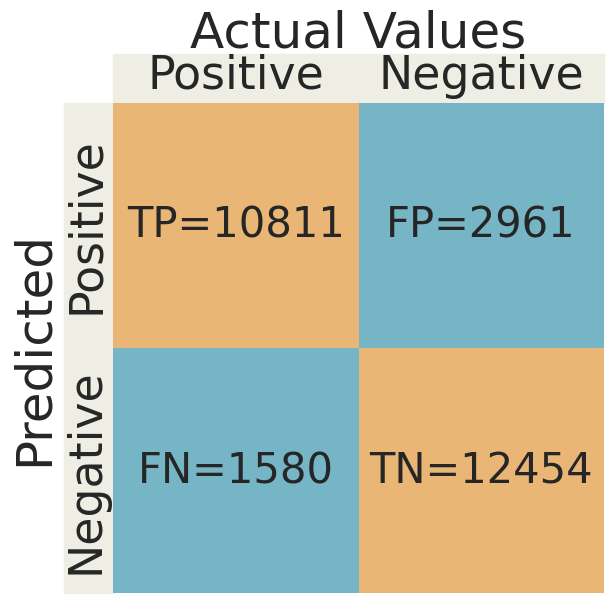

In [10]:
cf_matrix=confusion_matrix(y_test,pred)
cm = cf_matrix
sns.set(font_scale=3)
plt.figure(figsize=(7, 7))
ax = sns.heatmap(data=[[1, 0], [0, 1]], cmap=sns.color_palette(['#76b5c5', '#eab676'], as_cmap=True),
                 annot=[[f"TP={cm[0][0]:.0f}", f"FP={cm[0][1]:.0f}"], [f"FN={cm[1][0]:.0f}", f"TN={cm[1][1]:.0f}"]],
                 fmt='', annot_kws={'fontsize': 30}, cbar=False, square=True)

ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted')
ax.tick_params(length=0, labeltop=True, labelbottom=False)
ax.xaxis.set_label_position('top')
ax.set_xticklabels(['Positive', 'Negative'])
ax.set_yticklabels(['Positive', 'Negative'], rotation=90, va='center')
ax.add_patch(plt.Rectangle((0, 1), 1, 0.1, color='#eeeee4', clip_on=False, zorder=0, transform=ax.transAxes))
ax.add_patch(plt.Rectangle((0, 0), -0.1, 1, color='#eeeee4', clip_on=False, zorder=0, transform=ax.transAxes))
plt.tight_layout()
plt.show()

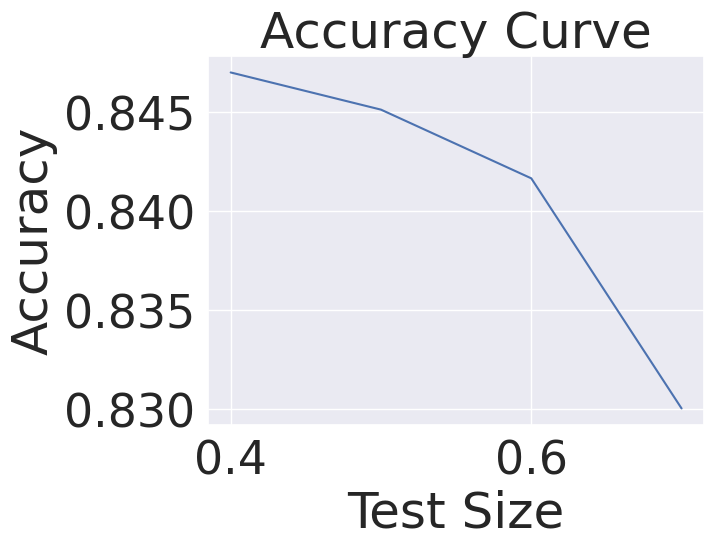

In [11]:
# Initialize lists to store test sizes and accuracies
test_sizes = [0.4, 0.5, 0.6, 0.7]
accuracies = []

# Iterate over different test sizes and calculate accuracies
for test_size in test_sizes:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=0)

    # Initialize and fit the SVM classifier with the best hyperparameters
    clf = MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)
    clf.fit(X_train, y_train)

    # Predict the labels for the test set
    pred = clf.predict(X_test)

    # Calculate the accuracy score
    score = metrics.accuracy_score(y_test, pred)
    accuracies.append(score)

    # print("test size={:.0%}, accuracy = {:.2%}".format(test_size, score))

# Plot the accuracy curve
plt.plot(test_sizes, accuracies)
plt.xlabel('Test Size')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.show()


In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

######### KNN ############
estimator = KNeighborsClassifier()
print(estimator.get_params().keys())

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])


In [13]:
# Create a KNN classifier
knn = KNeighborsClassifier()

# Define the hyperparameters to tune and their possible values
param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'metric':[ 'euclidean', 'manhattan', 'minkowski', 'cosine']}

# Create the GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and print the results
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best hyperparameters:  {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
Best score:  0.798926329396987


In [14]:

print("\n########## KNN algorithm ###########")
clf =KNeighborsClassifier(metric='euclidean', n_neighbors= 9, weights='distance')
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.30, random_state=0)
clf = clf.fit(X_train,y_train)
pred = clf.predict(X_test)
score=metrics.accuracy_score(y_test, pred)
print("test size=30, accuracy = {0:.2f}".format(100*score),"%")

clf =KNeighborsClassifier(metric='euclidean', n_neighbors= 9, weights='distance')
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.40, random_state=0)
clf = clf.fit(X_train,y_train)
pred = clf.predict(X_test)
score=metrics.accuracy_score(y_test, pred)
print("test size=40, accuracy = {0:.2f}".format(100*score),"%")

clf =KNeighborsClassifier(metric='euclidean', n_neighbors= 9, weights='distance')
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.50, random_state=0)
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
pred = clf.predict(X_test)
score=metrics.accuracy_score(y_test, pred)
print("test size=50, accuracy = {0:.2f}".format(100*score),"%")

clf =KNeighborsClassifier(metric='euclidean', n_neighbors= 9, weights='distance')
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.60, random_state=0)
clf = clf.fit(X_train,y_train)
pred = clf.predict(X_test)
score=metrics.accuracy_score(y_test, pred)
print("test size=60, accuracy = {0:.2f}".format(100*score),"%")

clf =KNeighborsClassifier(metric='euclidean', n_neighbors= 9, weights='distance')
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.70, random_state=0)
clf = clf.fit(X_train,y_train)
pred = clf.predict(X_test)
score=metrics.accuracy_score(y_test, pred)
print("test size=70, accuracy = {0:.2f}".format(100*score),"%")


########## KNN algorithm ###########
test size=30, accuracy = 84.39 %
test size=40, accuracy = 83.35 %
test size=50, accuracy = 82.70 %
test size=60, accuracy = 82.05 %
test size=70, accuracy = 80.90 %


In [15]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print(classification_report(y_test,pred))
print("Train Accuracy: ", accuracy_score(y_train, clf.predict(X_train))) # compare training actual and predicted value
print("Test Accuracy: ", accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.76      0.80     13772
           1       0.78      0.86      0.82     14034

    accuracy                           0.81     27806
   macro avg       0.81      0.81      0.81     27806
weighted avg       0.81      0.81      0.81     27806

Train Accuracy:  0.9991607922121517
Test Accuracy:  0.8089980579730993


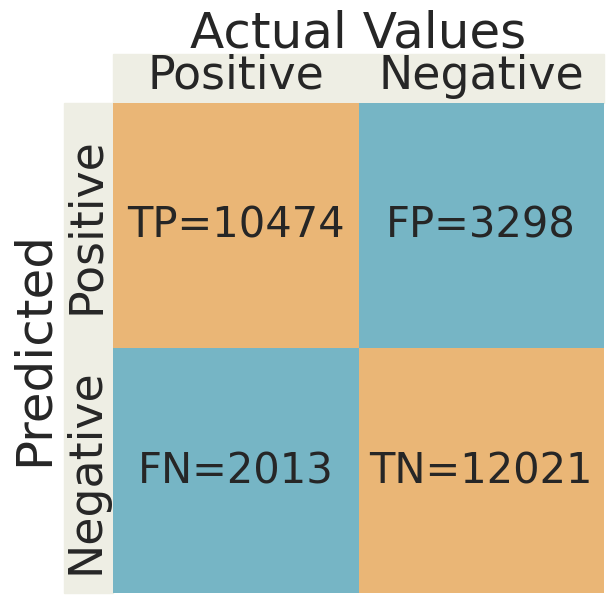

In [16]:
cf_matrix=confusion_matrix(y_test,pred)
cm = cf_matrix
sns.set(font_scale=3)
plt.figure(figsize=(7, 7))
ax = sns.heatmap(data=[[1, 0], [0, 1]], cmap=sns.color_palette(['#76b5c5', '#eab676'], as_cmap=True),
                 annot=[[f"TP={cm[0][0]:.0f}", f"FP={cm[0][1]:.0f}"], [f"FN={cm[1][0]:.0f}", f"TN={cm[1][1]:.0f}"]],
                 fmt='', annot_kws={'fontsize': 30}, cbar=False, square=True)

ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted')
ax.tick_params(length=0, labeltop=True, labelbottom=False)
ax.xaxis.set_label_position('top')
ax.set_xticklabels(['Positive', 'Negative'])
ax.set_yticklabels(['Positive', 'Negative'], rotation=90, va='center')
ax.add_patch(plt.Rectangle((0, 1), 1, 0.1, color='#eeeee4', clip_on=False, zorder=0, transform=ax.transAxes))
ax.add_patch(plt.Rectangle((0, 0), -0.1, 1, color='#eeeee4', clip_on=False, zorder=0, transform=ax.transAxes))
plt.tight_layout()
plt.show()

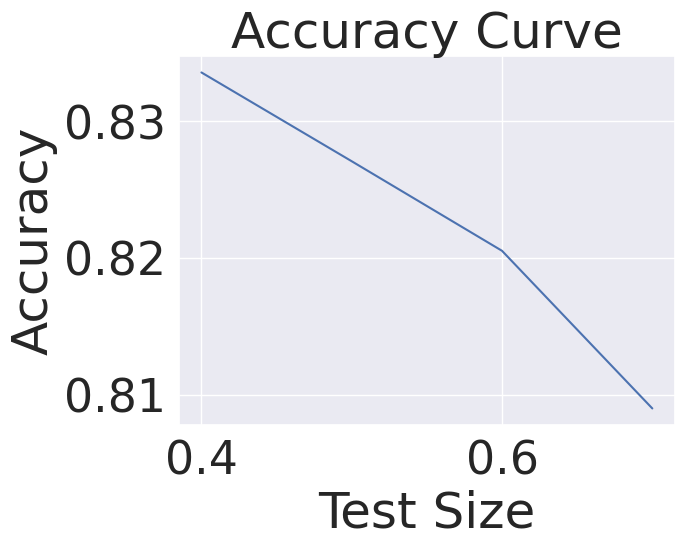

In [17]:
# Initialize lists to store test sizes and accuracies
test_sizes = [0.4, 0.5, 0.6, 0.7]
accuracies = []

# Iterate over different test sizes and calculate accuracies
for test_size in test_sizes:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=0)

    # Initialize and fit the SVM classifier with the best hyperparameters
    clf = KNeighborsClassifier(metric='euclidean', n_neighbors= 9, weights='distance')
    clf.fit(X_train, y_train)

    # Predict the labels for the test set
    pred = clf.predict(X_test)

    # Calculate the accuracy score
    score = metrics.accuracy_score(y_test, pred)
    accuracies.append(score)

    # print("test size={:.0%}, accuracy = {:.2%}".format(test_size, score))

# Plot the accuracy curve
plt.plot(test_sizes, accuracies)
plt.xlabel('Test Size')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.show()


In [18]:
#############  Random Forest Algorithm ###########

In [19]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

estimator = RandomForestClassifier()
print(estimator.get_params().keys())

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])


In [20]:
rf = RandomForestClassifier()

# set the hyperparameters to search
param_grid = {
    'n_estimators': [50, 100,],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 20, 50,],
    'min_samples_split': [2, 4, 6,],
    'min_samples_leaf': [1, 2, 3 ],
    'bootstrap': [True, False]
}

# perform grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and print the results
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Best hyperparameters:  {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100}
Best score:  0.8688326076486973


In [21]:

print("\n########## Random Forest algorithm ###########")
clf =RandomForestClassifier(bootstrap=False, criterion = 'entropy', max_depth = None, min_samples_leaf = 1, min_samples_split=2, n_estimators= 100)
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.30, random_state=0)
clf = clf.fit(X_train,y_train)
pred = clf.predict(X_test)
score=metrics.accuracy_score(y_test, pred)
print("test size=30, accuracy = {0:.2f}".format(100*score),"%")

clf =RandomForestClassifier(bootstrap=False, criterion = 'entropy', max_depth = None, min_samples_leaf = 1, min_samples_split=2, n_estimators= 100)
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.40, random_state=0)
clf = clf.fit(X_train,y_train)
pred = clf.predict(X_test)
score=metrics.accuracy_score(y_test, pred)
print("test size=40, accuracy = {0:.2f}".format(100*score),"%")

clf =RandomForestClassifier(bootstrap=False, criterion = 'entropy', max_depth = None, min_samples_leaf = 1, min_samples_split=2, n_estimators= 100)
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.50, random_state=0)
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
pred = clf.predict(X_test)
score=metrics.accuracy_score(y_test, pred)
print("test size=50, accuracy = {0:.2f}".format(100*score),"%")

clf =RandomForestClassifier(bootstrap=False, criterion = 'entropy', max_depth = None, min_samples_leaf = 1, min_samples_split=2, n_estimators= 100)
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.60, random_state=0)
clf = clf.fit(X_train,y_train)
pred = clf.predict(X_test)
score=metrics.accuracy_score(y_test, pred)
print("test size=60, accuracy = {0:.2f}".format(100*score),"%")

clf =RandomForestClassifier(bootstrap=False, criterion = 'entropy', max_depth = None, min_samples_leaf = 1, min_samples_split=2, n_estimators= 100)
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.70, random_state=0)
clf = clf.fit(X_train,y_train)
pred = clf.predict(X_test)
score=metrics.accuracy_score(y_test, pred)
print("test size=70, accuracy = {0:.2f}".format(100*score),"%")


########## Random Forest algorithm ###########
test size=30, accuracy = 91.99 %
test size=40, accuracy = 90.83 %
test size=50, accuracy = 90.28 %
test size=60, accuracy = 88.94 %
test size=70, accuracy = 87.78 %


In [22]:
##### support vector Machine ######

In [23]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

estimator = SVC()
print(estimator.get_params().keys())

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])


In [24]:
svm_clf = SVC()

# set the hyperparameters to search
param_grid = {
    'C':[1.0, 1.5, 2] ,
    'kernel':['rbf','linear'], 
    'degree':[1,2,3], 
    'shrinking':[True, False],
    'max_iter':[-1, 50, 100], 
}

# perform grid search
grid_search = GridSearchCV(estimator=svm_clf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and print the results
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-proce

Best hyperparameters:  {'C': 1.5, 'degree': 1, 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True}
Best score:  0.8621195436354265


In [25]:
print("\n########## Support Vectore Machine algorithm ###########")
clf =SVC(C=1.5, degree=1, kernel= 'linear', max_iter= -1, shrinking= True)
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.30, random_state=0)
clf = clf.fit(X_train,y_train)
pred = clf.predict(X_test)
score=metrics.accuracy_score(y_test, pred)
print("test size=30, accuracy = {0:.2f}".format(100*score),"%")

clf =SVC(C=1.5, degree=1, kernel= 'linear', max_iter= -1, shrinking= True)
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.40, random_state=0)
clf = clf.fit(X_train,y_train)
pred = clf.predict(X_test)
score=metrics.accuracy_score(y_test, pred)
print("test size=40, accuracy = {0:.2f}".format(100*score),"%")

clf =SVC(C=1.5, degree=1, kernel= 'linear', max_iter= -1, shrinking= True)
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.50, random_state=0)
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
pred = clf.predict(X_test)
score=metrics.accuracy_score(y_test, pred)
print("test size=50, accuracy = {0:.2f}".format(100*score),"%")

clf =SVC(C=1.5, degree=1, kernel= 'linear', max_iter= -1, shrinking= True)
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.60, random_state=0)
clf = clf.fit(X_train,y_train)
pred = clf.predict(X_test)
score=metrics.accuracy_score(y_test, pred)
print("test size=60, accuracy = {0:.2f}".format(100*score),"%")

clf =SVC(C=1.5, degree=1, kernel= 'linear', max_iter= -1, shrinking= True)
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.70, random_state=0)
clf = clf.fit(X_train,y_train)
pred = clf.predict(X_test)
score=metrics.accuracy_score(y_test, pred)
print("test size=70, accuracy = {0:.2f}".format(100*score),"%")



########## Support Vectore Machine algorithm ###########
test size=30, accuracy = 90.82 %
test size=40, accuracy = 90.23 %
test size=50, accuracy = 89.17 %
test size=60, accuracy = 88.18 %
test size=70, accuracy = 86.88 %


In [26]:
##### Logistic Regression Classifier ######

In [27]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV
import warnings

warnings.filterwarnings("ignore")

estimator = LogisticRegressionCV()
print(estimator.get_params().keys())

dict_keys(['Cs', 'class_weight', 'cv', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratios', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'refit', 'scoring', 'solver', 'tol', 'verbose'])


In [28]:
logistic = LogisticRegressionCV()

# set the hyperparameters to search
param_grid = {'Cs': [0.1, 1, 10, 100], 
              'penalty': ['l1', 'l2'],
              'max_iter': [100, 500, 1000]}


# perform grid search
grid_search = GridSearchCV(estimator=logistic, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and print the results
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best hyperparameters:  {'Cs': 100, 'max_iter': 100, 'penalty': 'l2'}
Best score:  0.8601890629092537


In [29]:
print("\n########## Logistic Regression algorithm ###########")
clf =LogisticRegressionCV(Cs= 10, penalty = 'l2', max_iter = 100)
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.30, random_state=0)
clf = clf.fit(X_train,y_train)
pred = clf.predict(X_test)
score=metrics.accuracy_score(y_test, pred)
print("test size=30, accuracy = {0:.2f}".format(100*score),"%")

clf =LogisticRegressionCV(Cs= 10, penalty = 'l2', max_iter = 100)
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.40, random_state=0)
clf = clf.fit(X_train,y_train)
pred = clf.predict(X_test)
score=metrics.accuracy_score(y_test, pred)
print("test size=40, accuracy = {0:.2f}".format(100*score),"%")

clf =LogisticRegressionCV(Cs= 10, penalty = 'l2', max_iter = 100)
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.50, random_state=0)
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
pred = clf.predict(X_test)
score=metrics.accuracy_score(y_test, pred)
print("test size=50, accuracy = {0:.2f}".format(100*score),"%")

clf =LogisticRegressionCV(Cs= 10, penalty = 'l2', max_iter = 100)
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.60, random_state=0)
clf = clf.fit(X_train,y_train)
pred = clf.predict(X_test)
score=metrics.accuracy_score(y_test, pred)
print("test size=60, accuracy = {0:.2f}".format(100*score),"%")

clf =LogisticRegressionCV(Cs= 10, penalty = 'l2', max_iter = 100)
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.70, random_state=0)
clf = clf.fit(X_train,y_train)
pred = clf.predict(X_test)
score=metrics.accuracy_score(y_test, pred)
print("test size=70, accuracy = {0:.2f}".format(100*score),"%")


########## Logistic Regression algorithm ###########
test size=30, accuracy = 91.36 %
test size=40, accuracy = 90.51 %
test size=50, accuracy = 89.43 %
test size=60, accuracy = 88.17 %
test size=70, accuracy = 86.76 %
